In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Medical Image Computing - Exercise 1

Jasmin Eder, Dorothea Mauracher, Sonja Pappenberger

## OCT image preprocessing framework 
#### 2.1 Load the OCT image (“OCTimage_raw.tif”) and investigate the image by analyzing the histogram. Show the histogram and discuss it.  

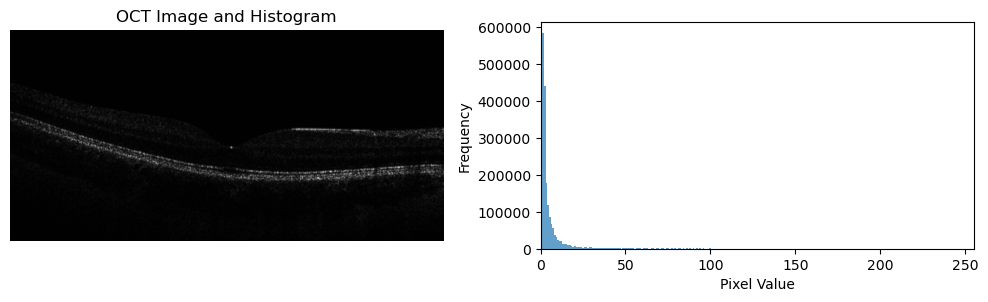

Range of pixal values in original Image: 1 - 253
Datatype of original Image:  uint16
Image width: 1128 pixels
Image height: 549 pixels
Number of channels: 3


In [15]:
# Read the image
image_bgr = cv2.imread("OCTimage_raw.tif", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
# Convert it to a bgr image
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Plot the image
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(image_rgb)
axs[0].axis('off')
axs[0].set_title('OCT Image and Histogram')
# Plot the histogram of the image
axs[1].hist(image_rgb.ravel(), bins=256, alpha=0.7)
axs[1].set_xlim(0, 255)
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the datatype
print("Range of pixal values in original Image: %s - %s" %(np.min(image_rgb), np.max(image_rgb)))
print('Datatype of original Image: ', image_rgb.dtype)

# Set the datatype due to range of pixel values
datatype = image_rgb.astype(np.uint8).dtype

# Get size of the image
height, width, channels = image_rgb.shape

print(f"Image width: {width} pixels")
print(f"Image height: {height} pixels")
print(f"Number of channels: {channels}")

In the histogram the amount of pixels with a low pixel value is very high. This means there are a lot of dark pixels. There is a peak at the (near) 0 pixel value indicating a dark color of the whole image. The frequency is not evenly spread meaning there is no good contrast and little detail in the image.
<br>
The datatype of the image is unit16 but the range is only from 1 to 253. Therefore for the following calculations a unit8 is used instead of a uint16.
    

#### 2.2 Define an intensity transformation to enhance the contrast. Which transformation did you choose and why? Show the transformed image.

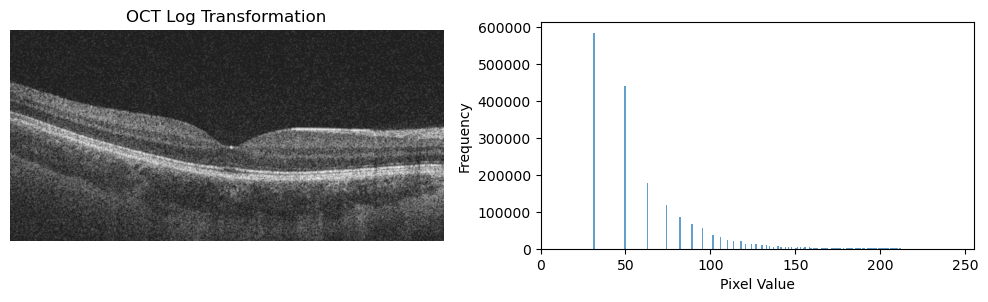

In [16]:
# Apply log transform.
c = 255/(np.log(1 + np.max(image_rgb))) 
log_transformed = c * np.log(1 + image_rgb) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = datatype) 

# Plot the log transformed image
fig, axs = plt.subplots(1, 2, figsize=(10,3))
axs[0].imshow(log_transformed)
axs[0].axis('off')
axs[0].set_title('OCT Log Transformation')
# Plot the histogram of the log transformed image
axs[1].hist(log_transformed.ravel(), bins=256, alpha=0.7)
axs[1].set_xlim(0, 255)
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Above a logarithmic transformation is used and the transformed image and its histogram are displayed. This transformation is chosen as it expands the values of dark pixels while compressing the higher-level values. As most of the pixels of the original image are quite dark the output image will appear brighter after using log transformation. In the histogram it can be seen that the frequencies of the pixel values are now more evenly spread than in the raw image.

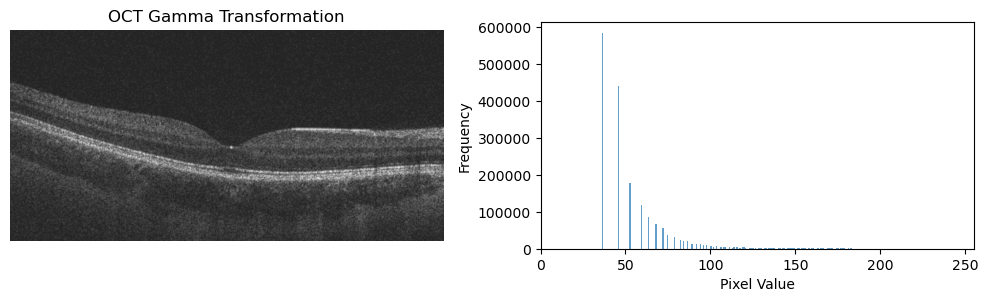

In [17]:
# Apply gamma correction 
gamma = 0.35
gamma_corrected = np.array(255*(image_rgb / 255) ** gamma, dtype = datatype) 

# Plot gamma corrected image
fig, axs = plt.subplots(1, 2, figsize=(10,3))
axs[0].imshow(gamma_corrected)
axs[0].axis('off')
axs[0].set_title('OCT Gamma Transformation')
# Plot histogram of gamma corrected image
axs[1].hist(gamma_corrected.ravel(), bins=256, alpha=0.7)
axs[1].set_xlim(0, 255)
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

With a gamma correction a similar result can be achieved as with the logarithmic transformation. Due to the chosen gamma value of 0.35 < 1 the values of the dark pixels are again expanded and values of the light pixels are compressed. A linear transformation would just shift the histogram but not affect the distribution of the frequencies and is therefore not used.

#### 2.3 Take a spatial filter of your choice and try to denoise the image. Which filter (and parameters) did you choose? Normalize the filtered image to the range of [0, 1] and use the filtered image for all subsequent steps. Show the filtered image. What were the effects?

##### Gaussian Filter

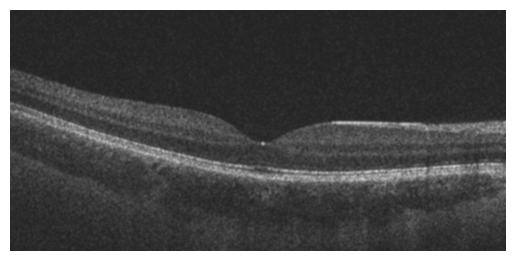

In [18]:
# Apply gaussian filter
gauss_img = cv2.GaussianBlur(gamma_corrected, (5, 5), cv2.BORDER_DEFAULT) 

plt.figure()
plt.imshow(gauss_img)
plt.axis('off')
plt.show()

A Gaussian Filter is used due to its characteristics to smoothen any sharp edges in images while minimizing too much blurring. <br>
The width and the height of the kernel need to be odd and therefore are set to 5 pixels. SigmaX is set to default and sigmaY is not specified and therefore has the same value as sigmaX. <br>
The effect of the filter is a smoothened image.

##### Normalization
The image is normalized by using the openCV function 'normalize'. Here it is to mention that the function expects floating-point input for normalization and therefore the datatype CV_23F needs to be set but the datatype for the original image is unit16. <br>
The result of the normalization is that the pixel values range from 0 to 1 which can be seen in the histogram. Due to normalization of the image the contrast increses.

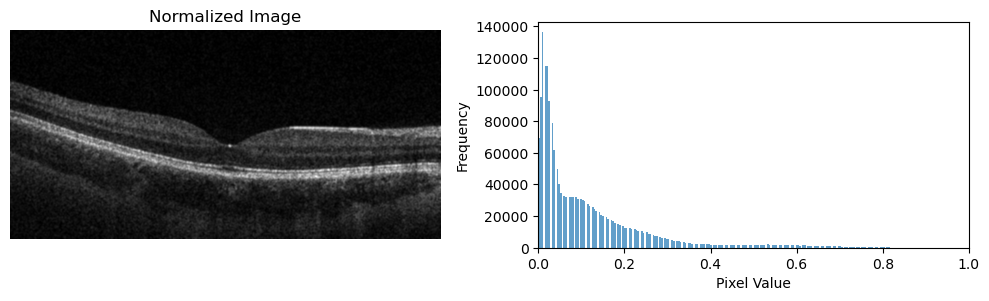

Range of pixel values in normalized image: 5.5879354e-09 - 1.0


In [19]:
img_norm = cv2.normalize(gauss_img, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Plot normalized image
fig, axs = plt.subplots(1, 2, figsize=(10,3))
axs[0].imshow(img_norm)
axs[0].axis('off')
axs[0].set_title('Normalized Image')
axs[1].hist(img_norm.ravel(), bins=256, alpha=0.7)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Range of pixel values in normalized image: %s - %s" % (np.min(img_norm), np.max(img_norm)))

#### 2.4. Select three pixels and analyze the 21 x 21 neighborhood: calculate the mean and standard deviation values for the three regions. Plot the histograms of the regions. What were the coordinates of the pixels? What are the characteristics of your selected regions?

Below the normalized image is copied in order to not make changes of the original normalized image. The pixel locations are chosen to show different areas of the OCT image. <br>
The pixel values of the zoomed in regions have the datatype float32 due to the normalized image. For better readability only 1 decimal is shown in the images. 

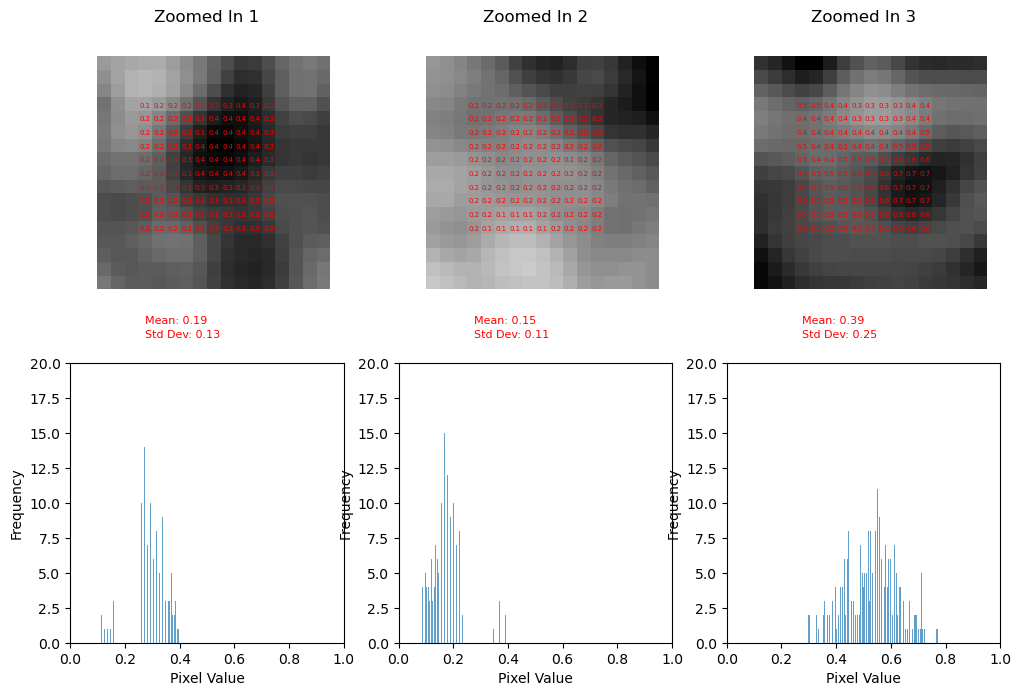

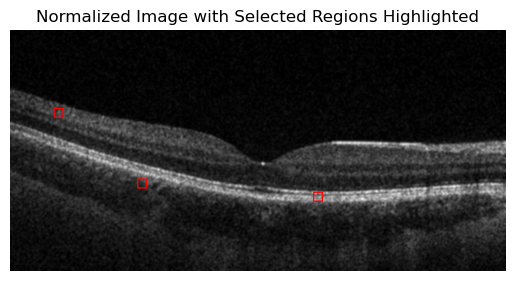

In [20]:
# Copy the image to make changes only on copied image
copied_image = np.copy(img_norm)

# Define the pixel locations (row, column) for zooming in
pixel_locations = [(190, 110), (350,300), (380,700)]

# Create a figure with subplots to display the zoomed-in regions
fig, axs = plt.subplots(2,3, figsize=(12,8))

# Lists to store mean and standard deviation values
mean_values=[]
std_dev_values = []

# Display the zoomed-in regions and highlight the selected regions in the original image
green_channel = copied_image[:, :, 1]
for i, (row, col) in enumerate(pixel_locations):
    zoomed_region = green_channel[row-10:row+10, col-10:col+10]
    cv2.rectangle(copied_image,(col-10,row-10),(col+10,row+10),(1.0,0.0,0.0),2)
    
    axs[0, i].imshow(zoomed_region, cmap='binary')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Zoomed In {i+1}')
    
    # Display pixel values on top of the zoomed-in regions with only 1 decimal for better reading
    for r in range(5, 15):
        for c in range(5, 15):
            axs[0, i].text(c, r, str("%.1f" % (zoomed_region[r, c])), color='red', fontsize=5, ha='center', va='center')
            
    # Plot histograms for the zoomed-in regions
    axs[1, i].hist(zoomed_region.ravel(), bins=256, alpha=0.7)
    axs[1, i].set_xlim(0, 1)
    axs[1, i].set_ylim(0, 20)
    axs[1, i].set_xlabel('Pixel Value')
    axs[1, i].set_ylabel('Frequency')
    
    # Calculate and display mean and standard deviation
    mean_value = np.mean(zoomed_region)
    std_dev_value = np.std(zoomed_region)
    mean_values.append(mean_value)
    std_dev_values.append(std_dev_value)
    
    axs[0, i].text(5, 21, f'Mean: {mean_value:.2f}', color='red', fontsize=8)
    axs[0, i].text(5, 22, f'Std Dev: {std_dev_value:.2f}', color='red', fontsize=8) 
    
# Show the original image with all selected regions highlighted
plt.figure()
plt.imshow(copied_image, cmap = 'binary')
plt.title('Normalized Image with Selected Regions Highlighted')
plt.axis('off')
plt.show()

The coordinates of the selected pixels are (190,110), (350,500) and (380,700). In the first and second region darker parts of the image are selected. This can also be seen in the histogram - here the maxima of pixel values are below 0.5. The third selected region is brighter and also more detailed. The histogram is more evenly spread which indicates a good contrast. 

#### 2.5 Define a threshold T and try to split the image into retina and vitreous. Which value did you pick and why?

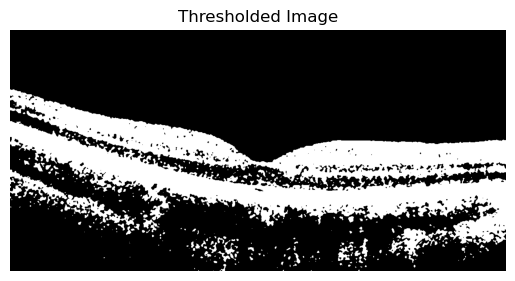

In [21]:
#define treshold
T=0.15


#apply the thresholding
ret, thresholded_image = cv2.threshold(img_norm,T,1,cv2.THRESH_BINARY)

plt.figure()
plt.imshow(thresholded_image, cmap = 'binary')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

As the image was normalized, all pixel values are either 0 or 1. The vitreous is displayed by a very dark / black area, whereas the retina contains more brighter pixels. For this reason, a threshold T = 0.4 is chosen. The threshold is determined from the histogram and manually adjusted. In the histograms in the section above the pixel values of the first and the second histrogram are below 0.4. In the last histogram the values are above the threshold.

## Edge detection
#### 3.1 Use the Sobel kernel to find the horizontal and vertical edges in the OCT image. Show the filtered images and describe them

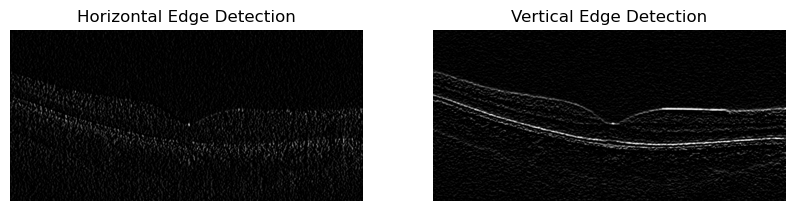

In [22]:
edge_x = cv2.Sobel(src=img_norm, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)  
edge_y = cv2.Sobel(src=img_norm, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,3))
axs[0].imshow(np.clip(edge_x, 0, 1), cmap='binary')
axs[0].axis('off')
axs[0].set_title('Horizontal Edge Detection')
axs[1].imshow(np.clip(edge_y, 0, 1), cmap='binary')
axs[1].axis('off')
axs[1].set_title('Vertical Edge Detection')
plt.show()

The sobel filter calculates edges depending on the pixel depth. It is applied on the normalized image. The size of the kernel is set to 3 because it needs to be an odd number. The vertical edge detection seems to fit better because clear separation lines between the retina, vitreous and choroid can be seen. 

#### 3.2 Calculate the image gradient based on the horizontal and vertical edges and show the gradient magnitude image.

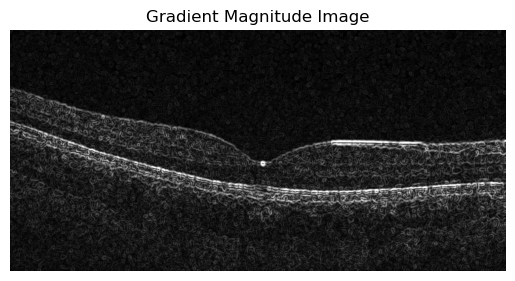

In [23]:
# Calculate the image gradient
gradient_magnitude = np.sqrt(edge_x**2 + edge_y**2)

plt.imshow(np.clip(gradient_magnitude, 0, 1), cmap = 'binary')
plt.title('Gradient Magnitude Image')
plt.axis('off')
plt.show()

#### 3.3 Specify a threshold on the gradient magnitude image and try to segment the most prominent boundaries in the image. What was the level of the threshold?

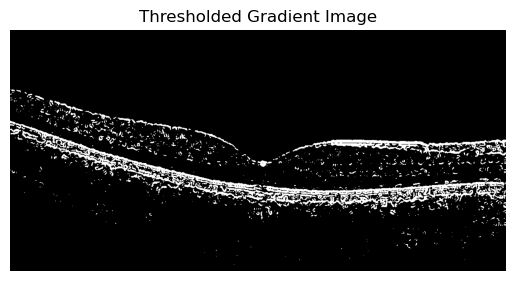

In [24]:
# define treshold
T=0.3

#apply the thresholding on one channel
gradient_thresholded_image = gradient_magnitude[:, :, 1] < T

plt.figure()
plt.imshow(gradient_thresholded_image, cmap = 'binary')
plt.title('Thresholded Gradient Image')
plt.axis('off')
plt.show()

A threshold of 0.3 is chosen because it seems to split the gradient image best into the important components. 

#### 3.4 (BONUS + 1 point) Use the canny edge detection to perform the same task and show the result. Discuss the choice of parameters for the canny edge detection

Datatype of Gauss Image:  uint8


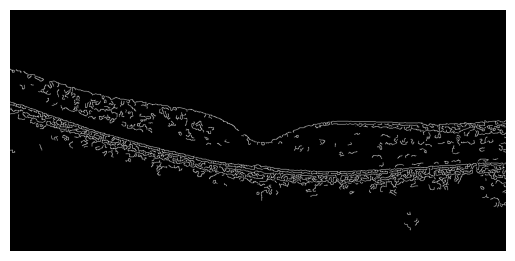

In [25]:
print('Datatype of Gauss Image: ', gauss_img.dtype)

canny_edges=cv2.Canny(gauss_img, 40, 70, 3, L2gradient = True)

plt.figure()
plt.imshow(canny_edges, cmap = 'gray')
plt.axis('off')
plt.show()

As the cv2.Canny function only accepts the datatype uint8 as input image, the non-normalized image with the applied gauss filter is used. As a minimum and maximum threshold the values 40 and 70 are chosen as the best result is achieved with those values. The size of the kernel is 3 pixels wich corresponds to the default size used by the function. The L2gradient is set to true as an more accurate equation is used in order to determine the edge gradient.

## Image segmentation 
#### 4.1 Use the Otsu thresholding algorithm to segment the image into retina and vitreous. What was the threshold found by the algorithm?

Obtained threshold:  76.0


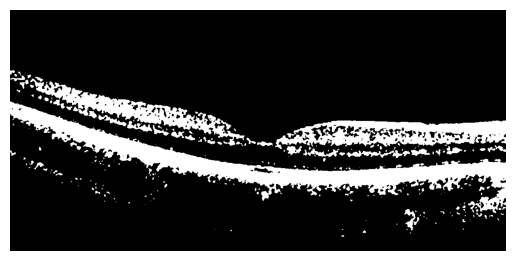

In [26]:
# use otsu thresholding algorithm
otsu_threshold, img_otsu = cv2.threshold(
    gauss_img[:,:,1], 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)

plt.imshow(img_otsu, cmap = 'gray')
plt.axis('off')
plt.show()

For the otsu threshold function only a uint8 or unit16 image can be used. Therefore instead of the normalized image, the gauss filtered image with datatype uint8 is used. The found threshold by the function is 76.

#### 4.2 (BONUS + 1 point) Choose one additional segmentation algorithm (you do not have to implement the algorithm by yourself) and perform the same task. Discuss the choice of the algorithm and the parameters you have used (try different).

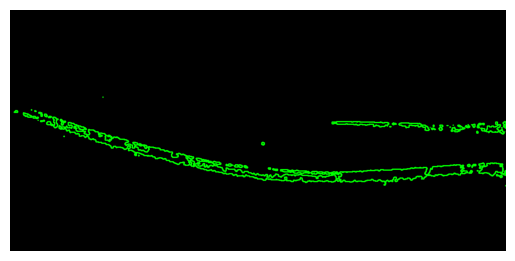

In [27]:
#Converting normalized image into an uint8 image
image_uint8 = cv2.convertScaleAbs(img_norm)[:, :, 1]

contours,_= cv2.findContours(image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = cv2.cvtColor(image_uint8, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0,255,0),2)

plt.figure()
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

As an additional segmentation filter an contour detection algortihm for segmentation is applied. The function findContours() uses as input an the image with datatype uint8, the expression RETR_EXTERNAL which specifies the retrieval mode, which means it retrieves only the external contours (contours that form the boundaries of objects) and the expression CHAIN_APPROX_SIMPLE which specifies the contour approximation method. 

#### 4.3. Segmentation evaluation: Assume that the goal was to find the boundary between the vitreous and the retina/choroid. Which of your segmentation algorithms (2.5, 3.3, 4.1; If applicable also 3.4 and/or 4.2) performed best and give a rationale?

In our opinion the segmentation algorithms applied in 3.3 (thresholded gradient image) and 3.4 (Canny edge detection) performed the best. In the resulting images clear separation lines between the vitreous and the retina/choroid can be seen. The algorithm used in 2.5 (threshold chosen manually) performed very well for the segmentation of the vitreous and the retina whereas as clear separation of the retina and choroid was not possible using the same threshold. Almost the same is true for the Otsu thresholding algortihm applied in 4.1. Also here a clear separation between the retina and choroid is not possible. The transition is not a clear line but more or less fluent. A rather poor performance was achieved by appliying the addionally chosen segmentation algorithm for contour detection. On the resulting image only a segmentation between retina and choroid is clear, but almost none for the vitreous and retina.